<a href="https://colab.research.google.com/github/james-monahan/Stats_Calc_Workshop/blob/main/Math6_ComplexNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmath
import warnings
warnings.filterwarnings("ignore")


#Complex Numbers

In [3]:
#natural numbers
#rational numbers (ratios)
#real numbers express distance along a line
#irrational numbers (sqrt, no representation as ratio)
#complex numbers real + i

In [4]:
#j symbolizes imaginary
a = 1
b = -3
z = complex(a, b)
print(z)

(1-3j)


In [5]:
print(z.real)
print(z.imag)

1.0
-3.0


In [6]:
def find_polar(z):
    from math import asin
    x = z.real
    y = z.imag
    r = (x**2 + y**2)**0.5
    phi = asin(y/r)
    return r, phi
find_polar(1-3j)

(3.1622776601683795, -1.2490457723982544)

In [7]:
z = 1-3j
cmath.polar(z)

(3.1622776601683795, -1.2490457723982544)

In [8]:
def complex_operations2(c1, c2):
    print('Addition =', c1 + c2)
    print('Subtraction =', c1 - c2)
    print('Multiplication =', c1 * c2)
    print('Division =', c1 / c2)

In [9]:
complex_operations2(10+2j/3, 2.9+1j/3)

Addition = (12.9+1j)
Subtraction = (7.1+0.3333333333333333j)
Multiplication = (28.77777777777778+5.266666666666666j)
Division = (3.429391054896336-0.16429782240187768j)


In [10]:
complex_operations2(1, 1j)

Addition = (1+1j)
Subtraction = (1-1j)
Multiplication = 1j
Division = -1j


In [11]:
def complex_operations1(c):
    modulus = abs(c)
    phase = cmath.phase(c)
    polar = cmath.polar(c)
    print('Modulus =', modulus)
    print('Phase =', phase)
    print('Polar Coordinates =', polar)
    print('Conjugate =',c.conjugate())
    print('Rectangular Coordinates =', \
           cmath.rect(modulus, phase))
complex_operations1(3+4j)

Modulus = 5.0
Phase = 0.9272952180016122
Polar Coordinates = (5.0, 0.9272952180016122)
Conjugate = (3-4j)
Rectangular Coordinates = (3.0000000000000004+3.9999999999999996j)


#Conditional Multiplication

In [15]:
def plot_complex(c, color='b', label=None):
    
    ax = plt.axes()
    ax.arrow(0, 0, c.real, c.imag, head_width=0.2, \
             head_length=0.3, color=color)
    ax.annotate(label, xy=(0.6*c.real, 1.15*c.imag))
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.grid(b=True, which='major') #<-- plot grid lines

In [16]:
#if phase condition, plot result of new angle (mult or sqrt)
def mult_complex(c, label1='old', label2='new'):
    
    phase = cmath.phase(c)
    plot_complex(c, label=label1)
    
    if phase == 0:
        result = -1
    elif phase < 0:
        print('old phase:', phase)
        result = cmath.sqrt(c)
        print('new phase:', cmath.phase(result))
        plot_complex(result, 'red', label=label2)
    elif phase > 0:
        print('old phase:', phase)
        result = c*c
        print('new phase:', cmath.phase(result))
        plot_complex(result, 'red', label=label2)
    return result

old phase: 0.8760580505981934
new phase: 1.7521161011963868


(-0.43999999999999995+2.4j)

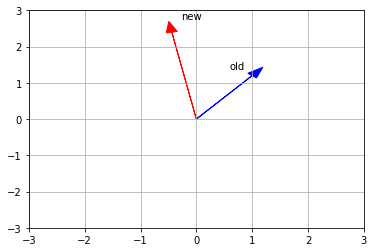

In [22]:
mult_complex(1 + 1.2j)

old phase: -0.8760580505981934
new phase: -0.43802902529909676


(1.1318237352126281-0.5301178808441246j)

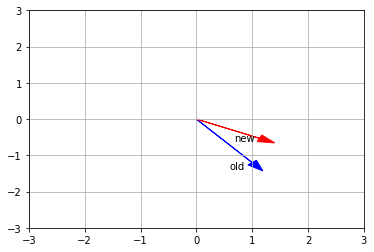

In [23]:
mult_complex(1-1.2j)

old phase: 0.8760580505981934
new phase: 1.7521161011963868
old phase: 1.7521161011963868
new phase: -2.778953104786813
old phase: -2.778953104786813
new phase: -1.3894765523934065
old phase: -1.3894765523934065
new phase: -0.6947382761967033
old phase: -0.6947382761967033
new phase: -0.3473691380983516
old phase: -0.3473691380983516
new phase: -0.1736845690491758


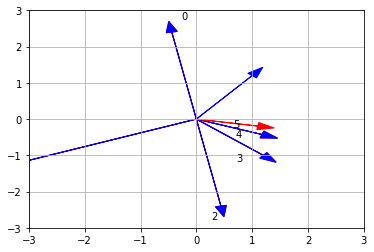

In [24]:
c0 = 1+1.2j
n = 0
while n < 6:
    c0 = mult_complex(c0, None, str(n))
    n+=1

#Calculating Retirement Plan

In [27]:
def retirement_n(current_balance, annual_salary, \
                 annual_cap, n, contrib, \
                 annual_salary_increase, employer_match, \
                 match_cap, rate):
    '''
    return :: retirement amount at year n
    '''
    
    annual_salary_n = annual_salary*(1+annual_salary_increase)**n
    
    your_contrib = contrib*annual_salary_n
    your_contrib = min(your_contrib, annual_cap)
    employer_contrib = contrib*annual_salary_n*employer_match
    employer_contrib = min(employer_contrib,match_cap\
                           *annual_salary_n*employer_match)
    
    contrib_total = your_contrib + employer_contrib
    
    return your_contrib, employer_contrib, current_balance + contrib_total*(1+rate)**n

In [29]:
def retirement_total(current_balance, annual_salary, \
    annual_cap=18000, contrib=0.05, \
    annual_salary_increase=0.02, employer_match=0.5, \
    match_cap=0.06, rate=0.03, current_age=35, \
    plan_years=35, life_expectancy=80, fees=0, \
    per_month=False):
    
    i = 0
    result = 0
    contrib_list = []; ematch_list = []; total_list = []
    
    while i <= plan_years:
        cn = retirement_n(current_balance=current_balance, \
             annual_salary=annual_salary, \
             annual_cap=annual_cap, n=i, \
             contrib=contrib, match_cap=match_cap, \
             annual_salary_increase=annual_salary_increase,\
             employer_match=employer_match, rate=rate)
        
        contrib_list.append(cn[0])
        ematch_list.append(cn[1]) 
        total_list.append(cn[2])
        
        result = result + cn[2]
        i+=1

        result = result - fees
    
    years_payback = life_expectancy - (current_age + plan_years)
     
    if per_month:
        months = 12
    else:
        months = 1
    result = result / (years_payback*months)
    print('You get back:',result)
    
    
    return result, contrib_list, ematch_list, total_list

In [30]:
result, contrib, ematch, total = retirement_total(current_balance=1000, plan_years=35,\
                 current_age=36, annual_salary=40000, \
                 per_month=True)

You get back: 3029.952393422356


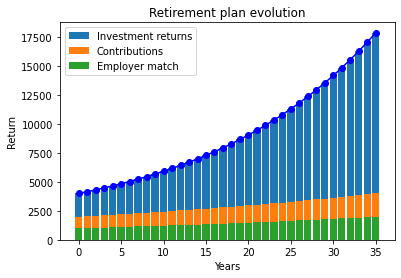

In [31]:
years = [i for i in range(len(total))]
plt.plot(years, total,'-o',color='b')
width=0.85
p1 = plt.bar(years, total, width=width)
p2 = plt.bar(years, contrib, width=width)
p3 = plt.bar(years, ematch, width=width)
plt.xlabel('Years')
plt.ylabel('Return')
plt.title('Retirement plan evolution')
plt.legend((p1[0], p2[0], p3[0]), ('Investment returns','Contributions','Employer match'))
plt.show()